# Task 3 - Clustering (28 points)

**Task Definition:** In this task, you try different clustering algorithms and evaluate them using the *Normalized Mutual Information (NMI)* and the *(Adjusted) Rand Score*. For the evaluation you can use the sklearn.metrics package. Try 4 different clustering techniques on the 4 datasets. Plot the clustering results and colour the points belonging to the same cluster with the same colour.

**Input:** The data folder cointaines the input files (`dataset1_noClusters2.csv`, `dataset2_noClusters2.csv`, `dataset3_noClusters2.csv`, `dataset4_noClusters7.csv`). In each dataset the data points have 2 features and 1 label, the number of clusters are in the name of the files. Don't forget to remove the labels when you apply clustering methods on the datasets. You need to cluster every data set with at least one clustering method.

**Clustering methods:** Use a clustering method from each of the 4 categories. For the evaluation try to find the best clustering result possible to get with your chosen clustering method. Discuss your results and explain why each clustering method succeeded or failed to cluster the data.
1. K-Means or K-Means++
2. Hierarchical clustering (single, complete or average linkage)
3. DBSCAN
4. Expectation Maximization

**Points:** In total you get 16 points for the implementation (clustering, plots, evaluation with numbers) and 12 points for the report (explanation, evaluation in text).

Dataset 1:
Clustering Algorithm: K-Means
NMI: 0.18956773826478157
Adjusted Rand Score: 0.2506261890110981


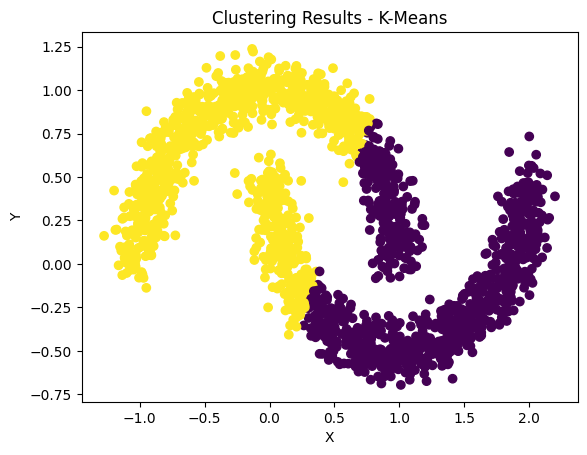

Clustering Algorithm: Hierarchical (Single Linkage)
NMI: 1.0
Adjusted Rand Score: 1.0


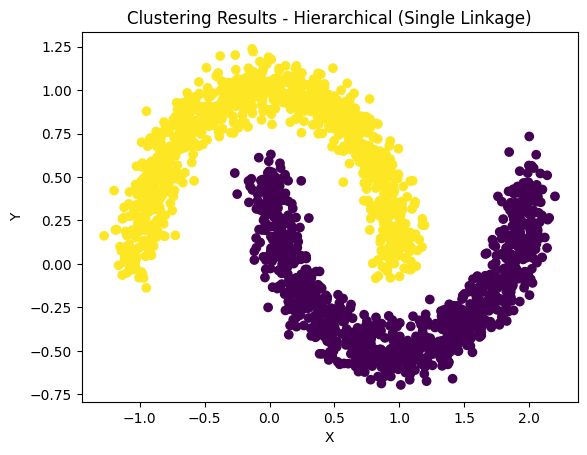

Clustering Algorithm: DBSCAN
NMI: 0.0
Adjusted Rand Score: 0.0


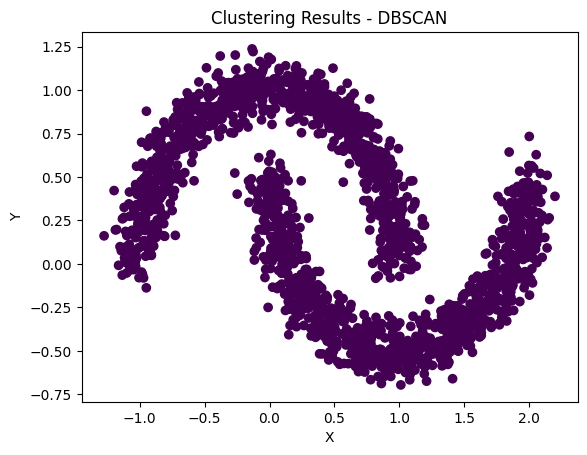

Clustering Algorithm: Expectation Maximization
NMI: 0.3864194605754735
Adjusted Rand Score: 0.4855516474046288


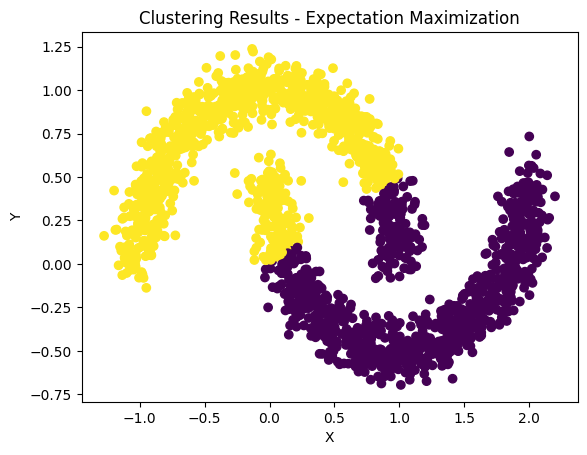



Dataset 2:
Clustering Algorithm: K-Means
NMI: 0.7233060840568207
Adjusted Rand Score: 0.8270456411597121


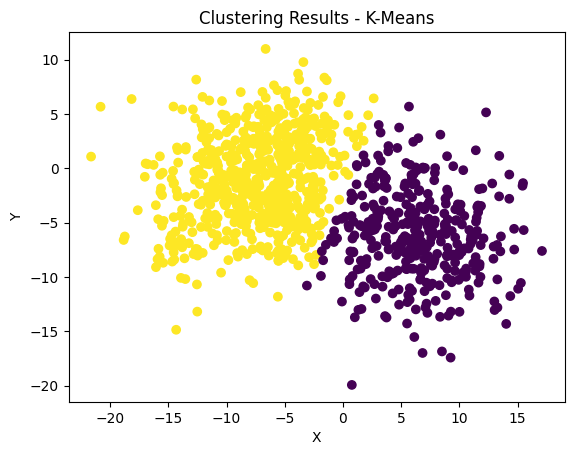

Clustering Algorithm: Hierarchical (Single Linkage)
NMI: 0.0030161938752889983
Adjusted Rand Score: 0.0014491561426885108


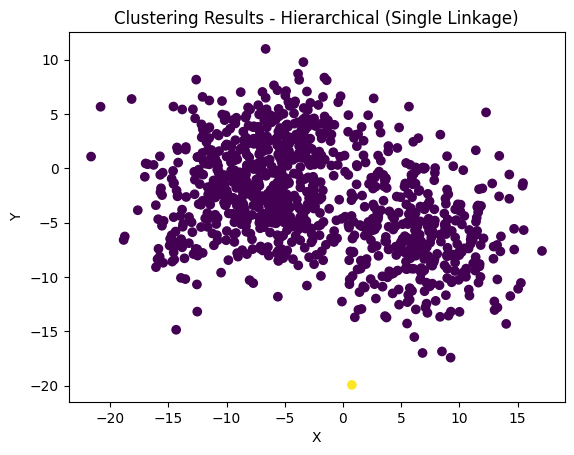

Clustering Algorithm: DBSCAN
NMI: 0.16273723865012257
Adjusted Rand Score: -0.042259970745596495


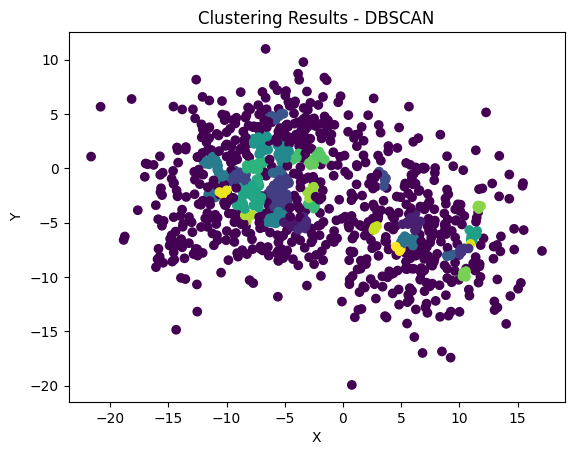

Clustering Algorithm: Expectation Maximization
NMI: 0.7414539379401562
Adjusted Rand Score: 0.8378727027679624


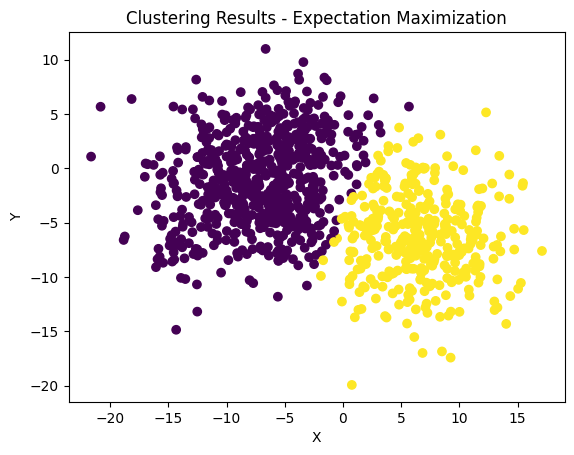



Dataset 3:
Clustering Algorithm: K-Means
NMI: 0.24365597887082174
Adjusted Rand Score: 0.317413061904747


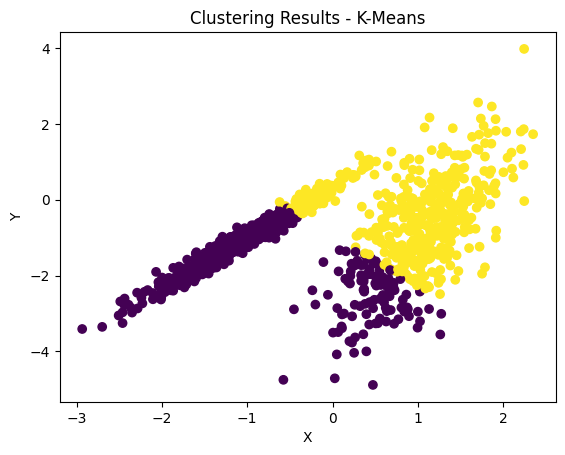

Clustering Algorithm: Hierarchical (Single Linkage)
NMI: 0.0019845924644280285
Adjusted Rand Score: 8.016064000254978e-06


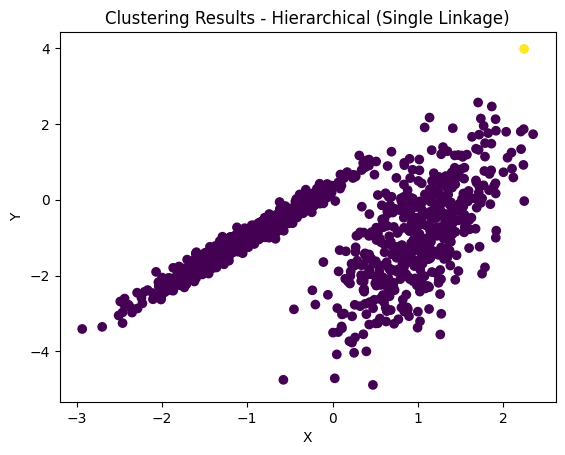

Clustering Algorithm: DBSCAN
NMI: 0.007754649300325794
Adjusted Rand Score: 8.01134491636807e-05


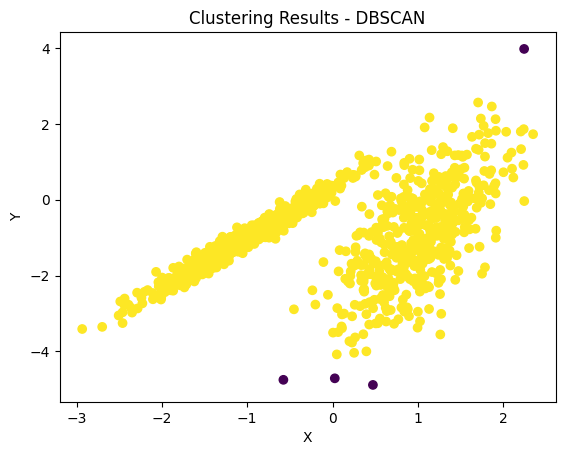

Clustering Algorithm: Expectation Maximization
NMI: 0.9623775427101197
Adjusted Rand Score: 0.984048032191744


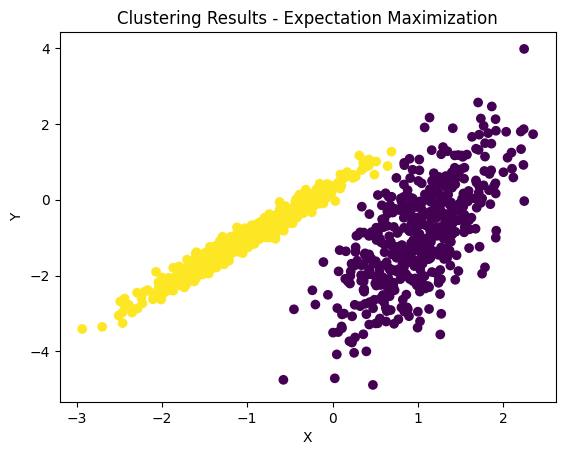



Dataset 4:
Clustering Algorithm: K-Means
NMI: 0.4940348972589915
Adjusted Rand Score: 0.34758519628789597


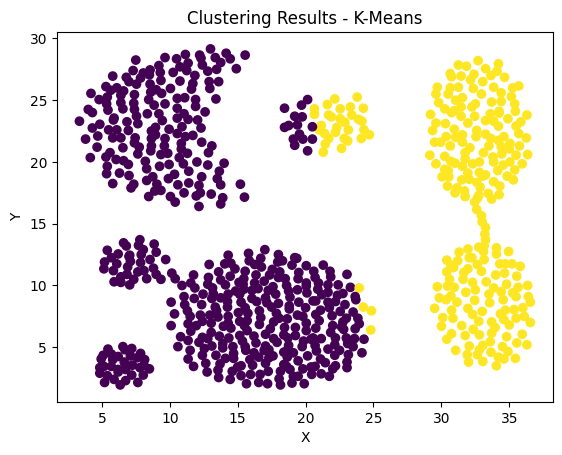

Clustering Algorithm: Hierarchical (Single Linkage)
NMI: 0.22880437642704649
Adjusted Rand Score: 0.06464521349589049


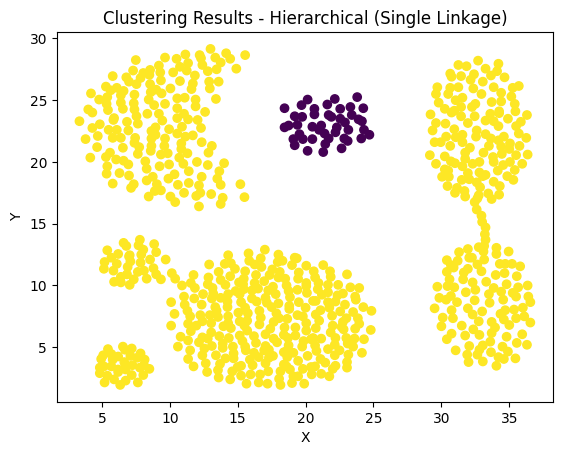

Clustering Algorithm: DBSCAN
NMI: 0.0
Adjusted Rand Score: 0.0


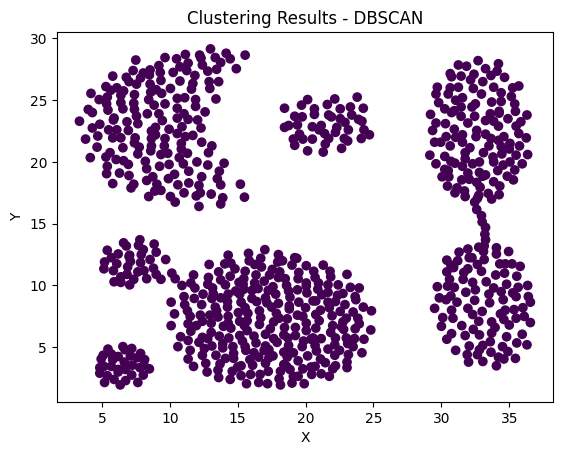

Clustering Algorithm: Expectation Maximization
NMI: 0.5268191526296805
Adjusted Rand Score: 0.3289699961992319


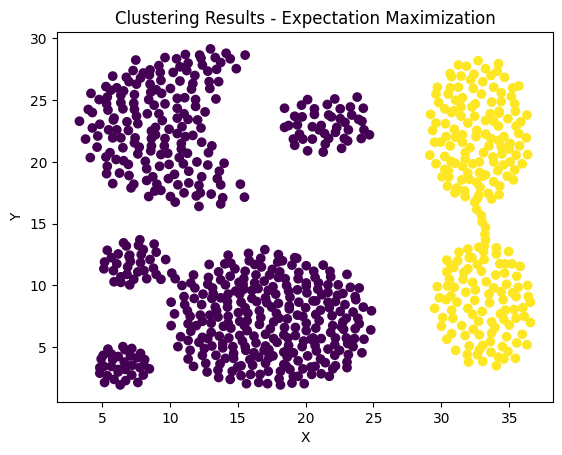

In [8]:
# TODO: uncomment the packages you used, please do not import additional non-native packages
# you may change the imports to the following format: from [package] import [class, method, etc.]
# https://towardsdatascience.com/expectation-maximization-em-algorithm-explained-step-by-step-english-english-1f352f2997
# https://towardsdatascience.com/cluster-analysis-in-python-9b5d1d6358c1
# https://towardsdatascience.com/a-comprehensive-guide-to-k-means-clustering-6075f60f199a
# https://scikit-learn.org/stable/modules/clustering.html
# For clustoring functions chatGPT is used

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

data_files = [
    r'C:\Users\HP\OneDrive\Desktop\FDAAssignment\fda_lab2_ss23\data\dataset1_noClusters2.csv',
    r'C:\Users\HP\OneDrive\Desktop\FDAAssignment\fda_lab2_ss23\data\dataset2_noClusters2.csv',
    r'C:\Users\HP\OneDrive\Desktop\FDAAssignment\fda_lab2_ss23\data\dataset3_noClusters2.csv',
    r'C:\Users\HP\OneDrive\Desktop\FDAAssignment\fda_lab2_ss23\data\dataset4_noClusters7.csv'
]

datasets = []

for file in data_files:
    dataset = pd.read_csv(file)
    datasets.append(dataset)

# K-Means clustering algorithm
def k_means_clustering(features, n_clusters):
    centroids = features.sample(n_clusters).values
    prev_centroids = np.zeros_like(centroids)
    labels = np.zeros(len(features))
    
    while not np.array_equal(centroids, prev_centroids):
        prev_centroids = centroids.copy()
        
        for i, feature in enumerate(features.values):
            distances = np.linalg.norm(feature - centroids, axis=1)
            labels[i] = np.argmin(distances)
        
        for j in range(n_clusters):
            centroids[j] = np.mean(features[labels == j].values, axis=0)
    
    return labels

# Single Linkage Agglomerative Clustering
def hierarchical_clustering(features, n_clusters):
    dendrogram = sch.linkage(features.values, method='single')
    labels = sch.fcluster(dendrogram, n_clusters, criterion='maxclust')
    return labels

# DBSCAN Clustering
def dbscan_clustering(features, eps, min_samples):
    labels = np.zeros(len(features))
    visited = np.zeros(len(features))
    cluster_id = 0
    
    def region_query(p, eps):
        return np.where(np.linalg.norm(features.values - features.values[p], axis=1) <= eps)[0]
    
    def expand_cluster(p, neighbors, cluster_id):
        labels[p] = cluster_id
        i = 0
        
        while i < len(neighbors):
            q = neighbors[i]
            
            if not visited[q]:
                visited[q] = 1
                neighbors_q = region_query(q, eps)
                
                if len(neighbors_q) >= min_samples:
                    neighbors = np.append(neighbors, neighbors_q)
            
            if labels[q] == 0:
                labels[q] = cluster_id
            
            i += 1
    
    for p in range(len(features)):
        if not visited[p]:
            visited[p] = 1
            neighbors = region_query(p, eps)
            
            if len(neighbors) < min_samples:
                labels[p] = -1
            else:
                cluster_id += 1
                expand_cluster(p, neighbors, cluster_id)
    
    return labels

# Expectation Maximization Clustering
def expectation_maximization(features, n_components):
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(features)
    labels = gmm.predict(features)
    return labels


clustering_algorithms = [
    ('K-Means', k_means_clustering),
    ('Hierarchical (Single Linkage)', hierarchical_clustering),
    ('DBSCAN', dbscan_clustering),
    ('Expectation Maximization', expectation_maximization)
]

# evaluate methods on each dataset
for i, dataset in enumerate(datasets):
    features = dataset[['X', 'Y']]
    labels = dataset['label']

    print(f"Dataset {i+1}:")

    for name, algorithm in clustering_algorithms:
        # Apply clustering algorithm
        if name == 'DBSCAN':
            eps = 0.5 
            min_samples = 5  
            predicted_labels = algorithm(features, eps, min_samples)
        elif name == 'Expectation Maximization':
            n_components = 2  
            predicted_labels = algorithm(features, n_components)
        else:
            n_clusters = 2 
            predicted_labels = algorithm(features, n_clusters)

        # Calculate NMI and Rand Score metrics
        nmi = normalized_mutual_info_score(labels, predicted_labels)
        rand_score = adjusted_rand_score(labels, predicted_labels)

        print(f"Clustering Algorithm: {name}")
        print(f"NMI: {nmi}")
        print(f"Adjusted Rand Score: {rand_score}")

        # Plot clustering results
        plt.scatter(features['X'], features['Y'], c=predicted_labels)
        plt.title(f"Clustering Results - {name}")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()

    print("\n")
